In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
data=pd.read_csv('Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [3]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [4]:
#Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

data.shape

The dataset contains 50002 rows and 14 columns


(50002, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# Stastic about dataset
# data.describe().style.background_gradient(cmap='bone_r')
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
# Checking the null values 
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
# Checking the dublicate values in the data
# dublicate_values=data.duplicated().sum()
# print(f'The data contains {dublicate_values} dublicate_values')
data.duplicated().sum()

719

In [9]:
# drop the dublicate values
data=data.drop_duplicates()
data.shape

(49283, 14)

**** EDA Report****

In [10]:
# from ydata_profiling import ProfileReport

# data = pd.read_csv("Passanger_booking_data.csv")

# prof = ProfileReport(data, title='EDA Report of Airline Passanger Booking Data',explorative=True)

# prof.to_file('EDA_report.html')

 ****About DataSet****

In [11]:
# Check the data types of each column
# data_types = data.dtypes

# # Select columns with non-numeric data (e.g., object or category data types)
# non_numeric_columns = data.select_dtypes(exclude=['number'])

# # Convert non-numeric columns to numeric using one-hot encoding
# data_numeric = pd.get_dummies(data, columns=non_numeric_columns.columns)

# Calculate and visualize the correlation for the entire dataset
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, fmt='.2f',annot_kws=None, linewidths=1)
# plt.title("Understand the correlation with each column")
# plt.show()

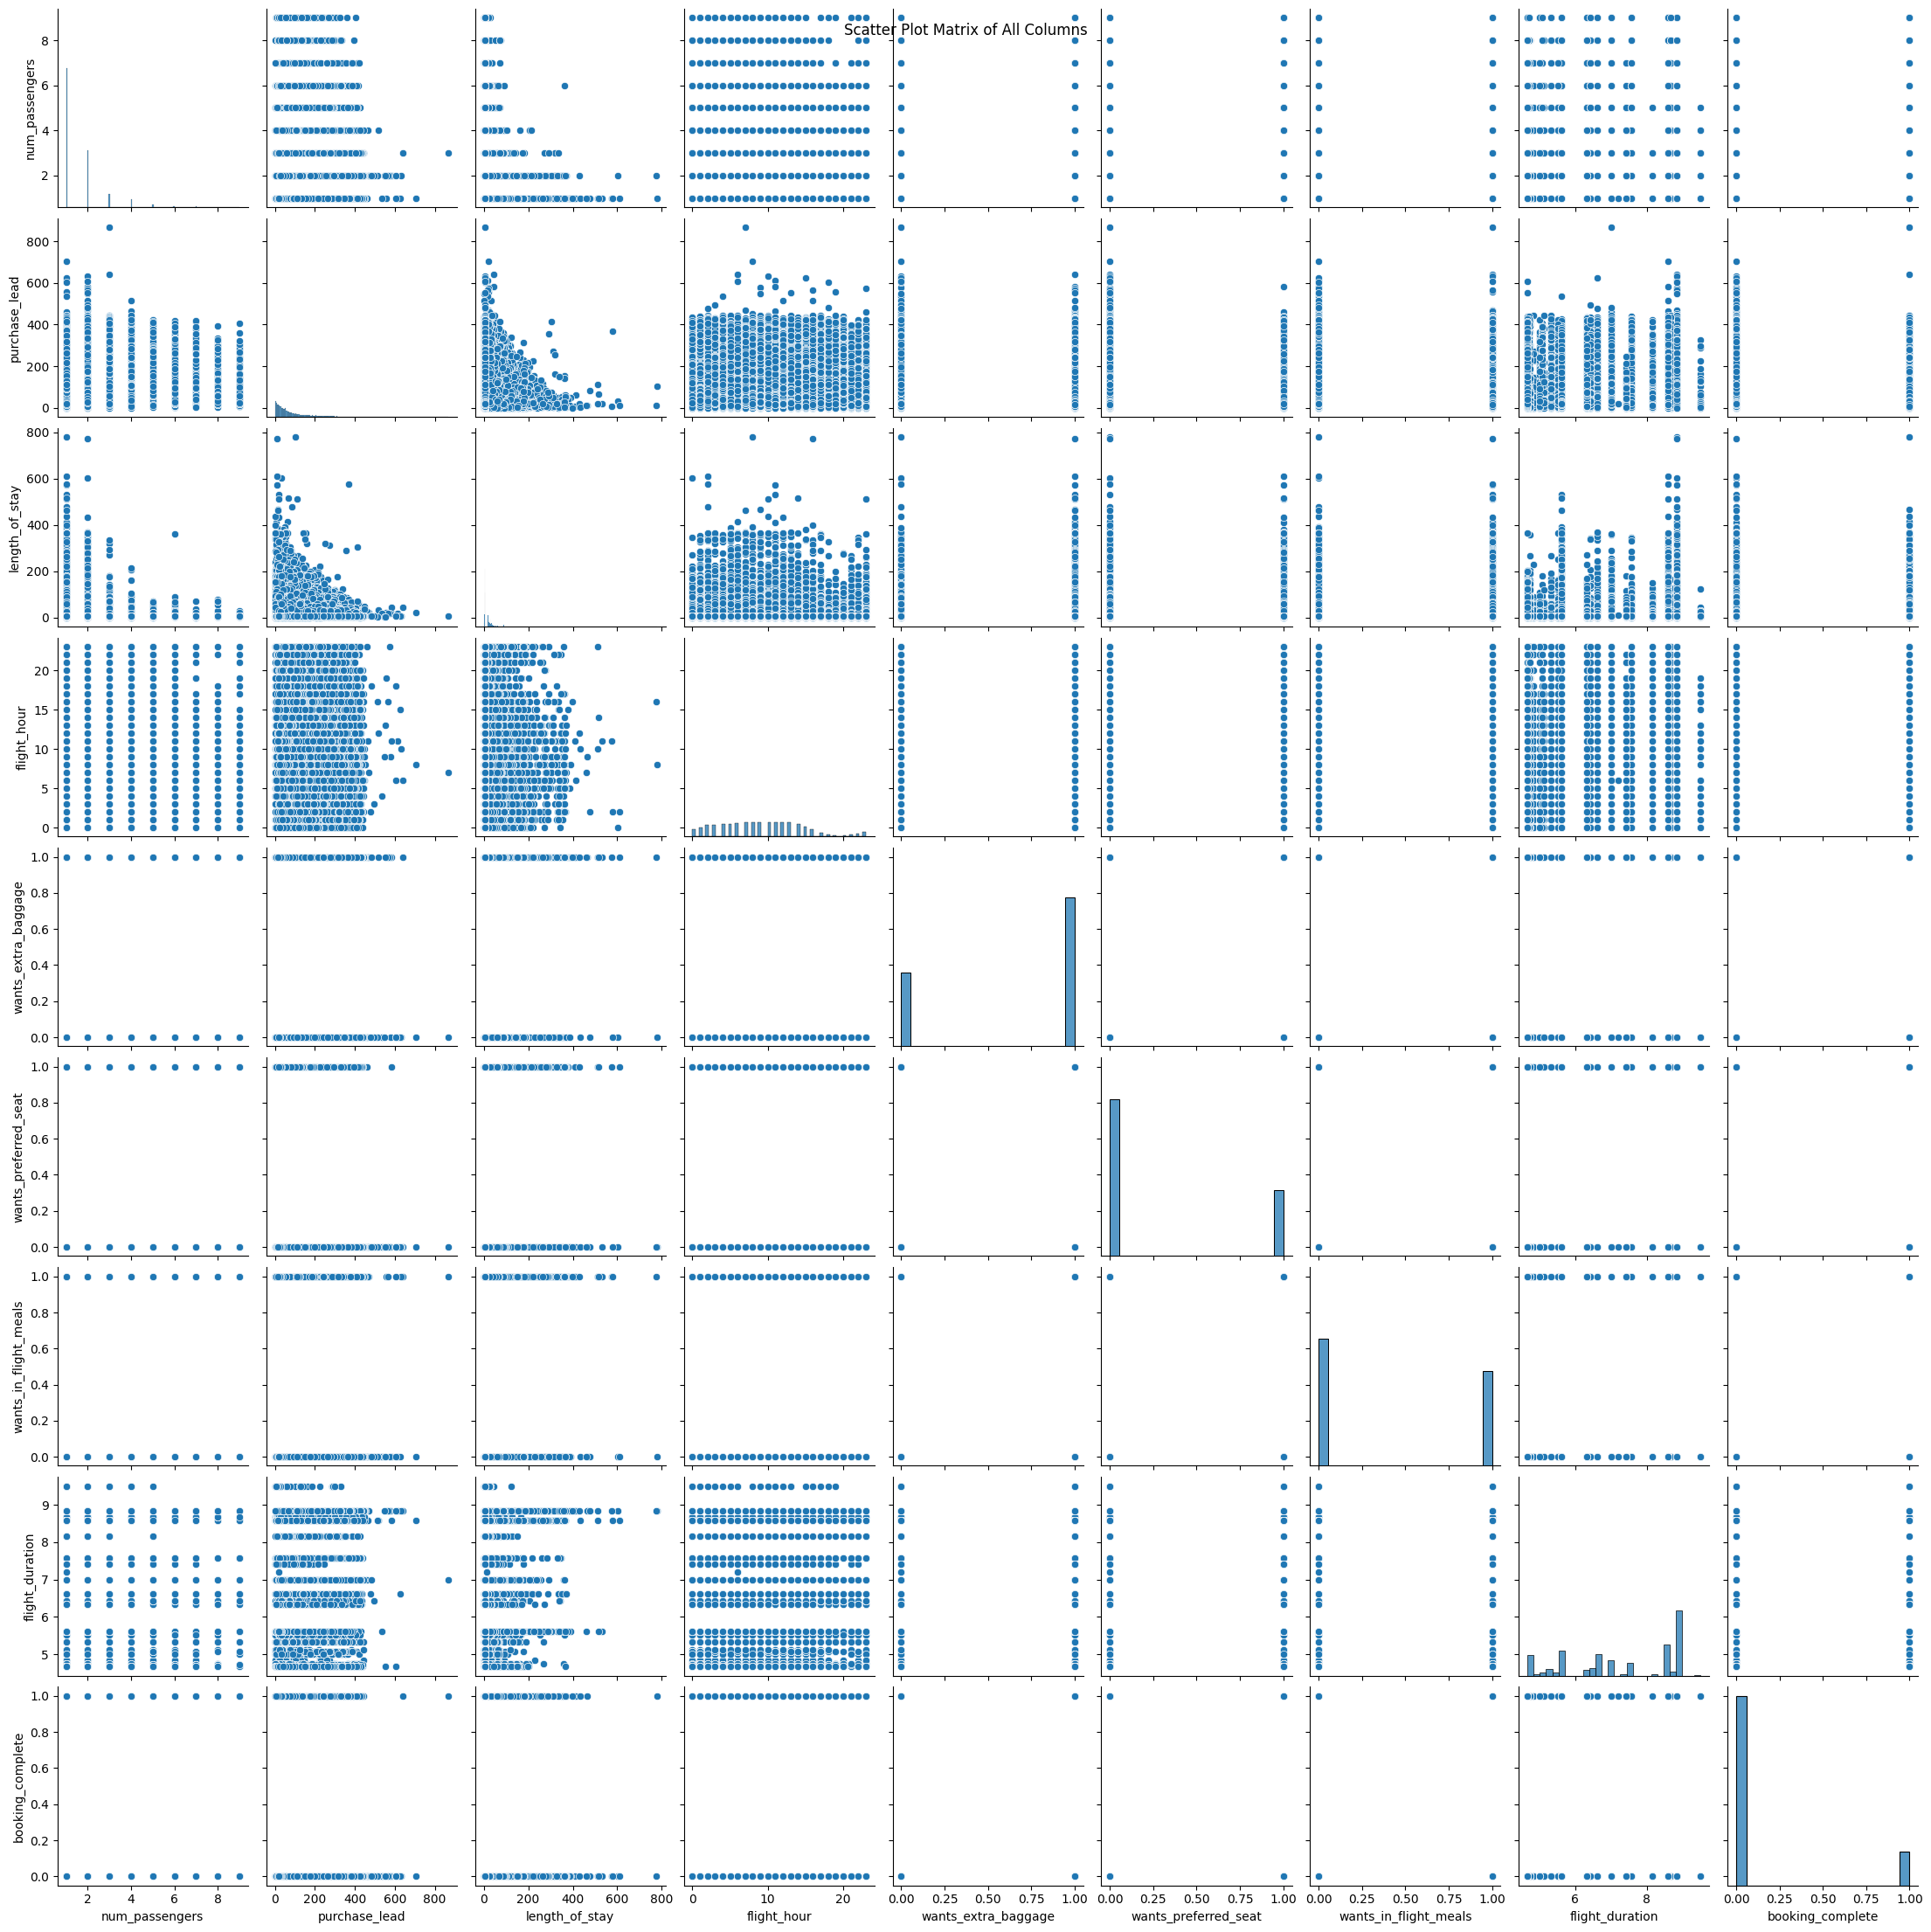

In [14]:

# Create a pairplot with scatter plots for all pairs of columns
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix of All Columns")
plt.show()

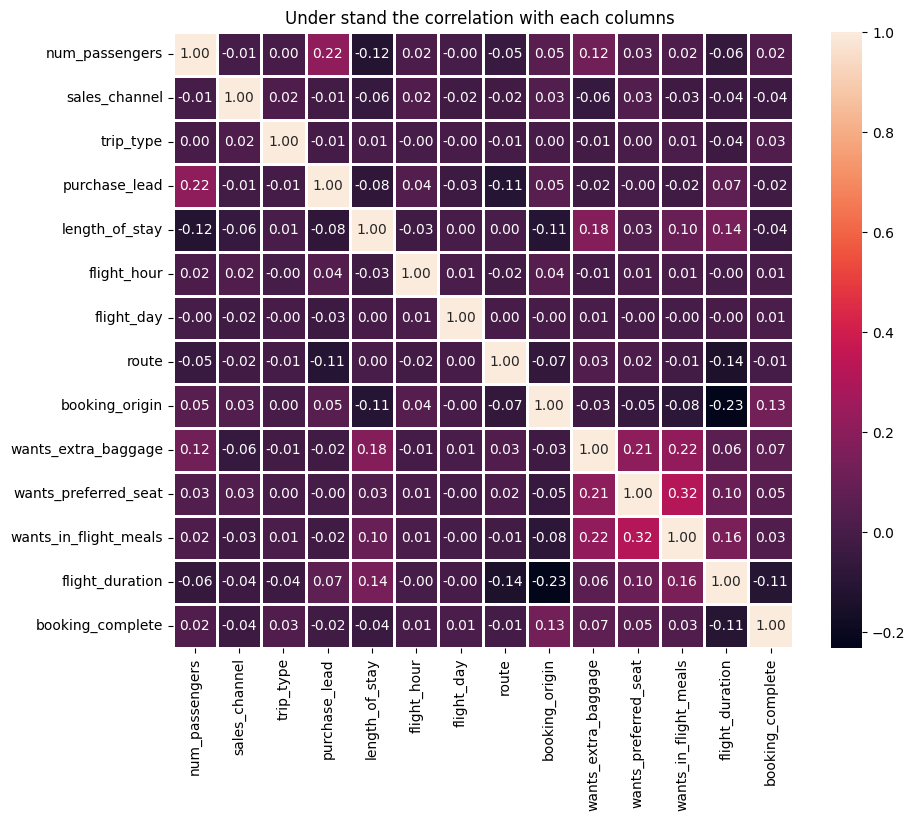

In [31]:
# # Visualize the correlation map
plt.figure(figsize=(10,8)) 
# sns.heatmap(data.corr(),annot=True,fmt ='.2f', annot_kws = None, linewidths = 1,)
sns.heatmap(data.corr(),annot=True,fmt='.2f', annot_kws=None, linewidths=1)

plt.title("Under stand the correlation with each columns ")
plt.show()

**Explore Data Analysis**

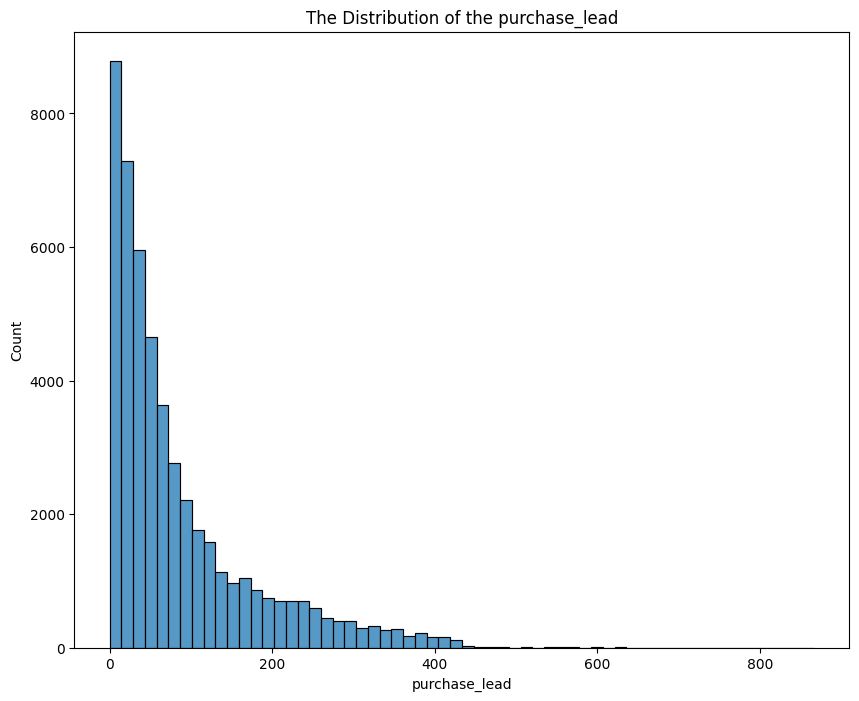

In [23]:
# Distribution of the num of passengers in the data
plt.figure(figsize=(10,8))
sns.histplot(data['purchase_lead'],bins = 60 )
plt.title("The Distribution of the purchase_lead") 
plt.show()

In [14]:
# total_sales_channel= data['trip_type'].value_counts()/data ['trip_type'].value_counts()
# internet = data[data['sales_channel'] == 'Internet'].trip_type.value_counts() 
# Mobile = data[data['sales_channel'] == 'Mobile'].trip_type.value_counts()
# total_sales= data['trip_type'].value_counts() 
# sales_done_by_mobile=(total_sales/internet)-.108 
# total_sales['Color']=np.where(sales_done_by_mobile < 0, 'blue','red')
# fig=plt.Figure(plt.Bar(x=(Mobile/total_sales).index,y=(Mobile/total_sales ).values-.108 ))
# fig.show()

Text(0, 0.5, 'Count of values')

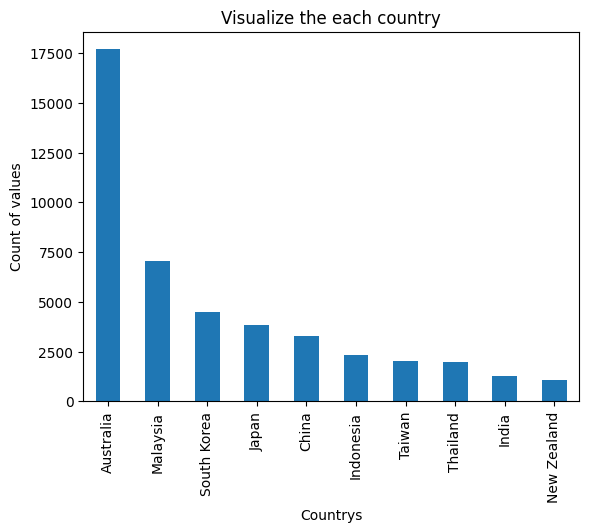

In [15]:
# Create a bar plot visualize the top 10 most demanding origin 
data ['booking_origin'].value_counts().sort_values(ascending = False).nlargest(10).plot(kind='bar')
plt.title("Visualize the each country") 
plt.xlabel("Countrys")
plt.xticks(rotation=90)
plt.ylabel("Count of values")

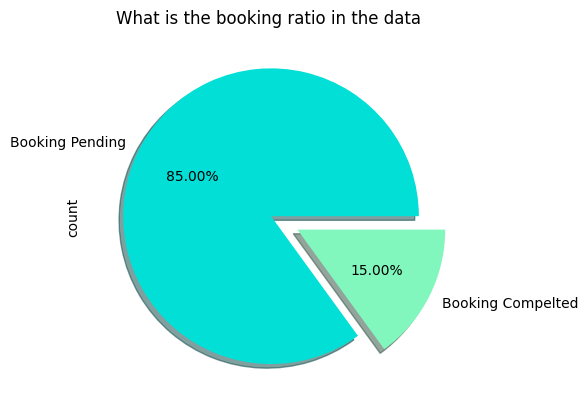

In [16]:
# Using the pie chart understand the how much precentage is complete there bookings
data ['booking_complete'].value_counts().plot(kind = 'pie',explode = [ 0,0.2 ],labels = ['Booking Pending',"Booking Compelted"],colors = ['#01DFD7','#81F7BE'],autopct ='%1.2f%%',shadow = True)                                                       
plt.title("What is the booking ratio in the data ") 
plt.show ()                                                        

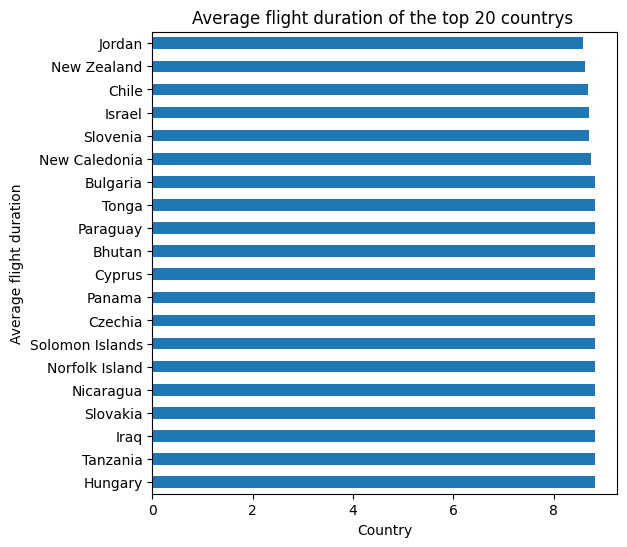

In [17]:
# Find the average flight duration of the top 20 destination in the bar charts
data.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False).nlargest(20).plot(kind='barh',figsize=(6,6))
plt.title("Average flight duration of the top 20 countrys ")
plt.xlabel("Country")
plt.ylabel("Average flight duration")
plt.show()



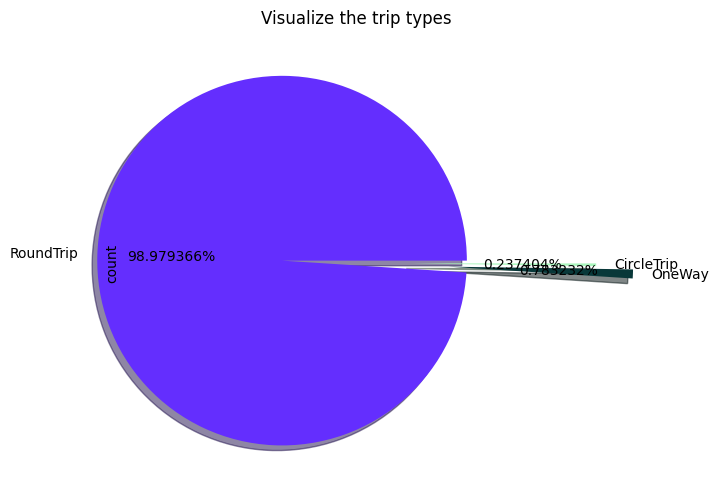

In [18]:
# How much percentage people intrested in the trip types 
trip_type = ['trip_type']
for i,col in enumerate(trip_type ): 
    plt.figure(figsize = (10,6))
    data[col].value_counts().plot(kind='pie',explode=[0.4,0.5,0.3],labels = [ 'RoundTrip',"OneWay",'CircleTrip'],colors = [ '#642EFE','#083839','#A9F5BC'] , autopct = '%1.6f%%',shadow = True )
    plt.title("Visualize the trip types")
    plt.show()


In [19]:
# Create countplot understand the booking status on the flight day 
# plt.figure(figsize = (10,5))
# sns.countplot(data =data ,x ='flight_day', hue = 'booking_complete' )
# plt.title("How many tickets booked during the each day") 
# plt.show()

<Figure size 1000x500 with 0 Axes>

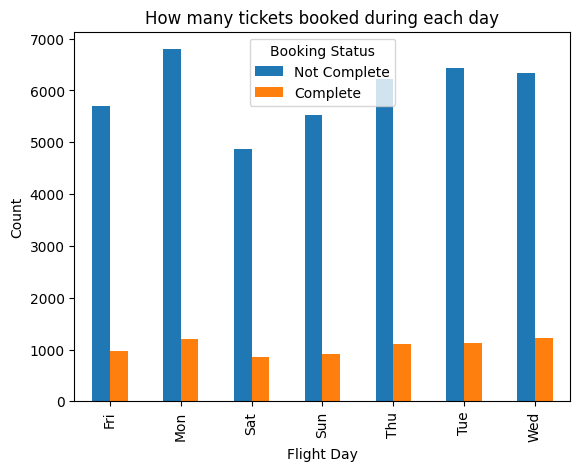

In [20]:
# Group the data by 'flight_day' and 'booking_complete', and count the occurrences
counts = data.groupby(['flight_day', 'booking_complete']).size().unstack()

# Plot a stacked bar chart
plt.figure(figsize=(10, 5))
counts.plot(kind='bar')
plt.title("How many tickets booked during each day")
plt.xlabel("Flight Day")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=['Not Complete', 'Complete'])
plt.show()

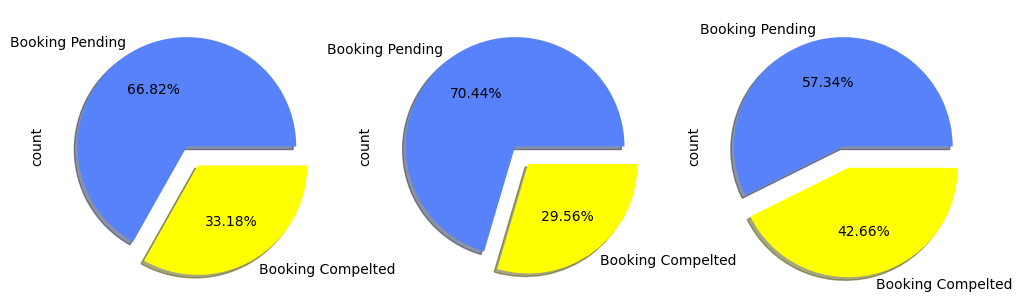

In [21]:
# Create a data frame for the extra
df=['wants_extra_baggage','wants_preferred_seat' , 'wants_in_flight_meals']
plt.figure(figsize = (12,5))
for i,col in enumerate(df): 
    plt.subplot(1,3,i+1)
    data[col].value_counts().plot(kind='pie',explode=[0,0.2],
                                 labels=['Booking Pending',"Booking Compelted"],
                                 colors=['#5882FA' , '#FFFF00'],
                                 autopct='%1.2f%%',
                                 shadow=True)
    

Text(0.5, 1.0, 'Find the how much percentage of booking completed through the channel')

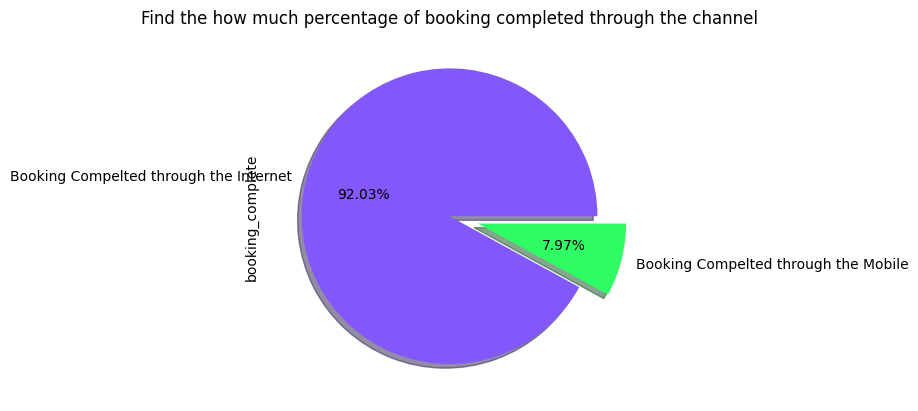

In [22]:
# Let's Compare How much percentage of the booking complete through mobile and internet
data.groupby('sales_channel') ['booking_complete'].sum ().plot( kind = 'pie',
                                                               explode=[0,0.2],
                                                               labels=['Booking Compelted through the Internet',"Booking Compelted through the Mobile"],
                                                               colors = [ '#8258FA','#2EFE64'],
                                                               autopct='%1.2f%%',
                                                               shadow=True)
plt.title("Find the how much percentage of booking completed through the channel") 
                                                               

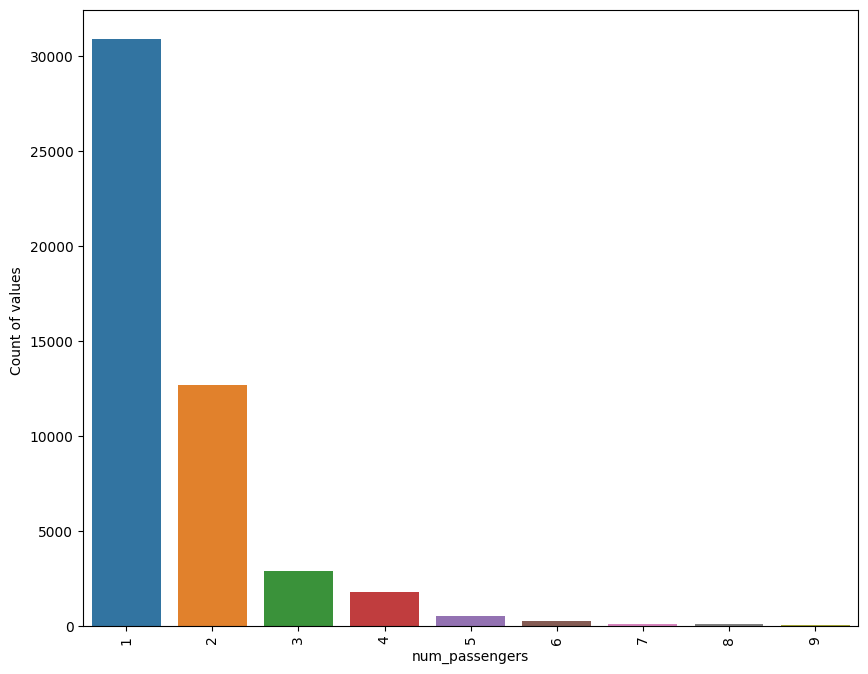

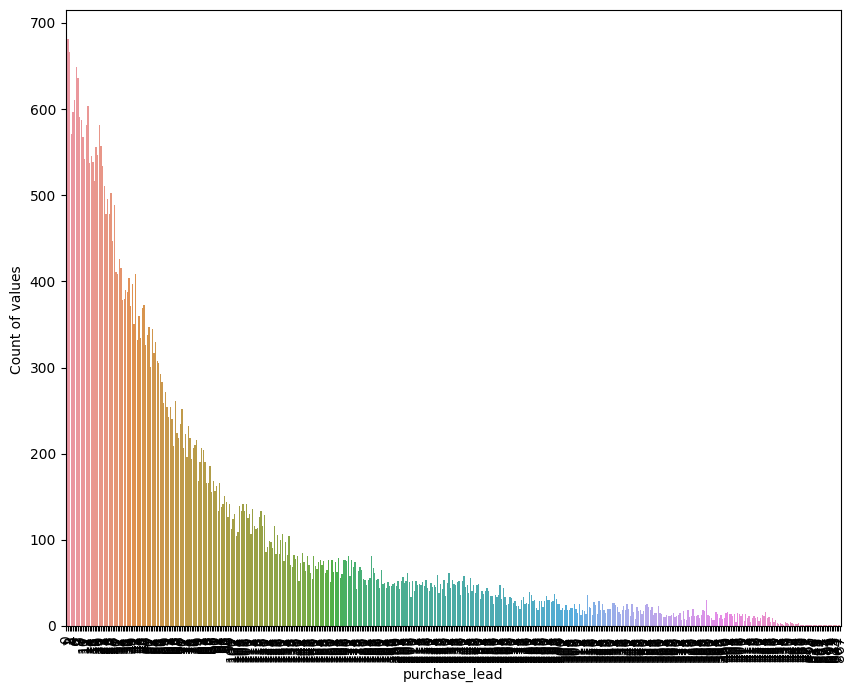

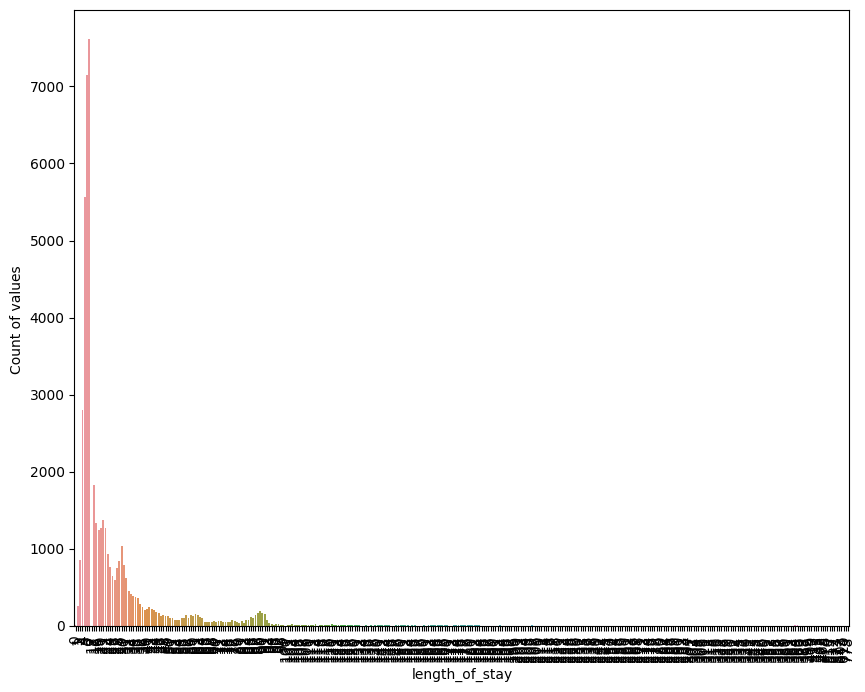

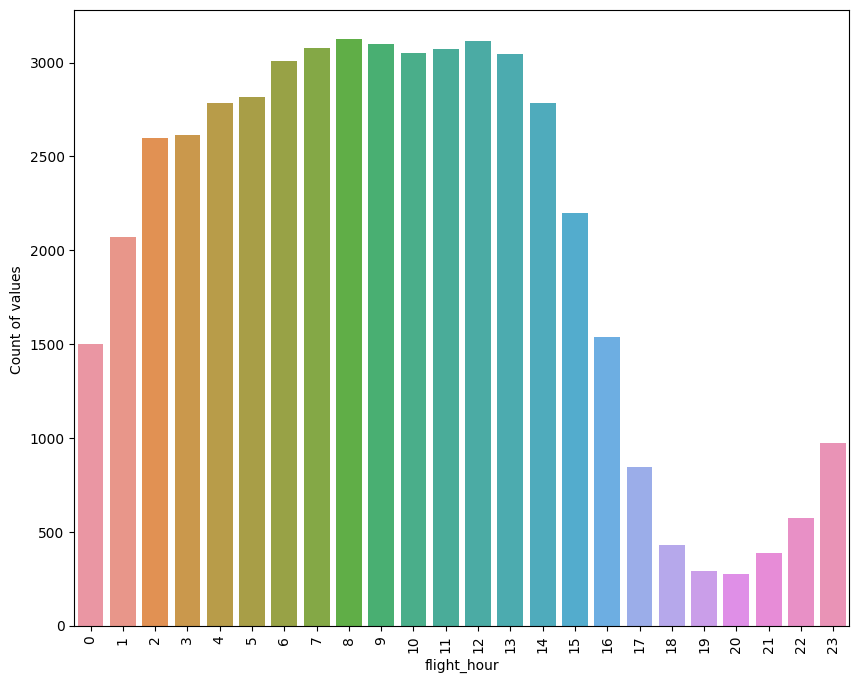

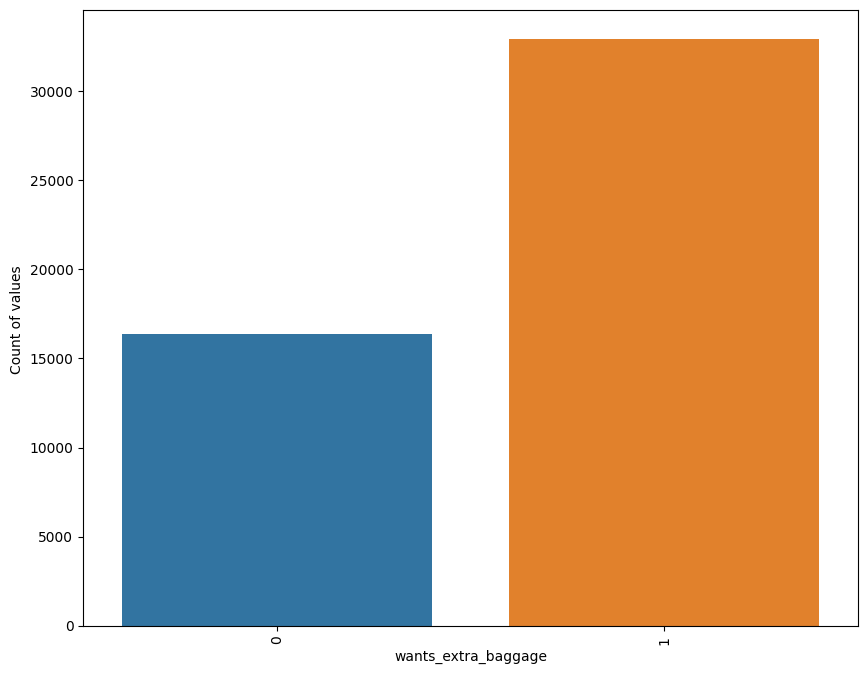

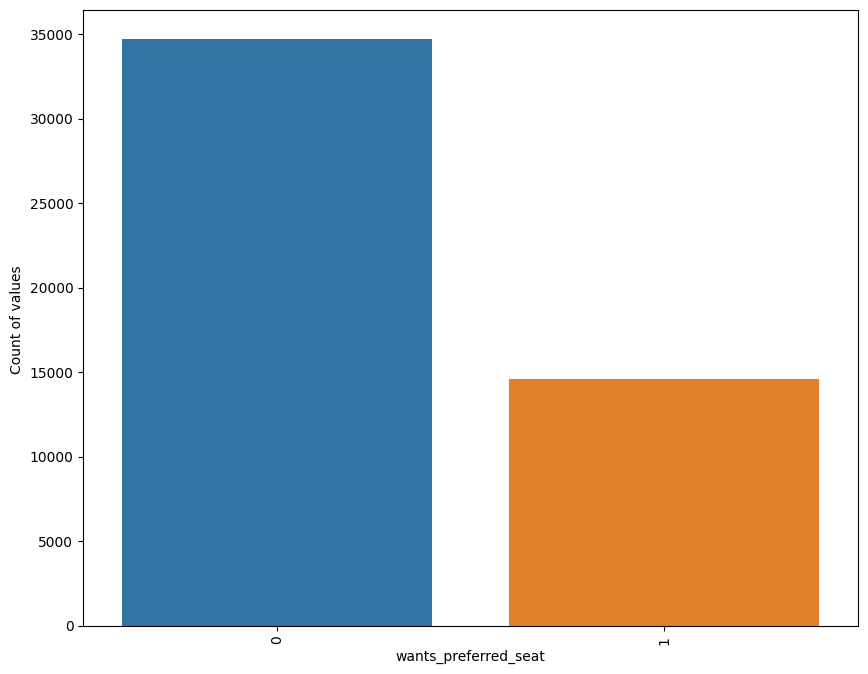

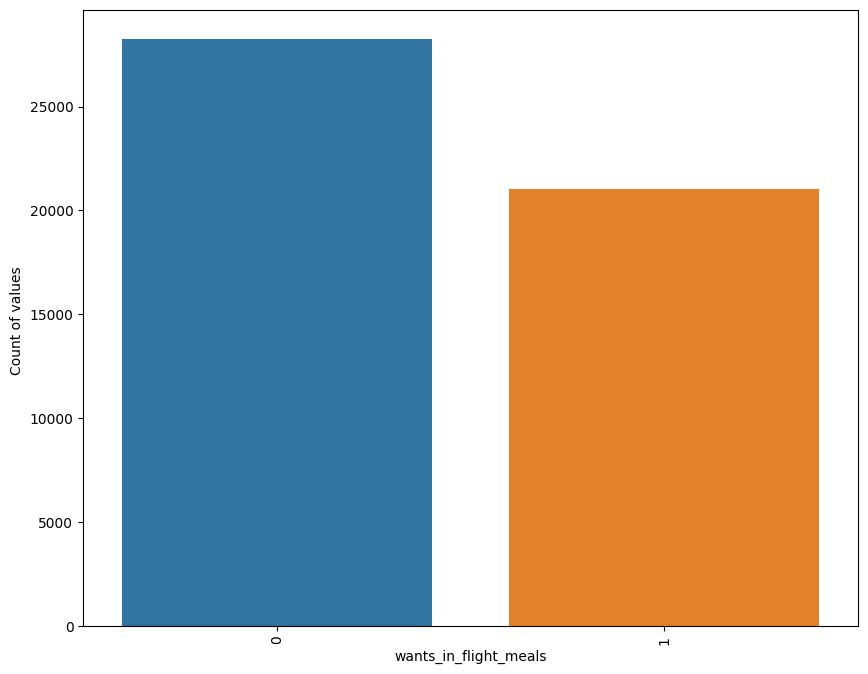

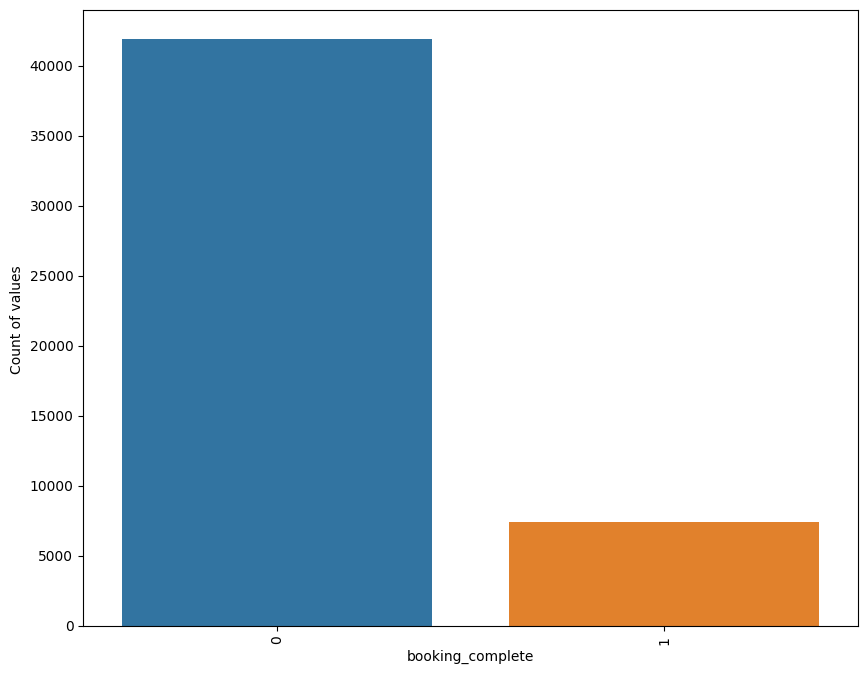

In [23]:
# Create a countplot to understand the each columns values in the data
for i in data.select_dtypes (include = 'int'):
    plt.figure(figsize = (10,8))
    sns.countplot(data = data ,x= data [i])
    plt.xlabel (f'{i}')
    plt.ylabel('Count of values ') 
    plt.xticks (rotation = 90) 
    plt.show()
    

In [24]:
# Using the pivot table find the each origin and day most ticket are booked
pd.pivot_table(data,index='booking_origin',columns='flight_day',values='booking_complete').style.background_gradient(cmap='plasma')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.050225,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


**Machine Learning Modeling**

In [25]:
# Import the all required Libraries for machine Learning modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [26]:
# Covert the categorical data into the numerical using the Labelencoder
for col in data.select_dtypes ( include ='object').columns:
    label_encoder = LabelEncoder() 
    label_encoder.fit(data[col].unique ()) 
    data[col]=label_encoder.transform(data[col])
    

In [27]:
# Divided the data into independent and dependent variables
x = data.drop(['booking_complete','purchase_lead','route'],axis = 1)
y = data['booking_complete']
# Scalling the data 
scaler=StandardScaler() 
x = scaler.fit_transform(x)
# Split the data into train and test data
x_train , x_test , y_train , y_test = train_test_split(x ,y,test_size = 0.20 ,random_state = 120 )

In [28]:
# Create a function for machine Learning model
def model_bulding ( model , x_train , x_test , y_train , y_test ):
    print(f'Name of the {model}')
    model.fit( x_train , y_train )
    y_pred = model.predict(x_test)
    score=accuracy_score( y_test,y_pred) 
    print ( f'\nThe Accuracy score is {score*100 : .2f}')
    print ( f'\n {classification_report (y_test ,y_pred )}')
    print(f'\n{confusion_matrix (y_test ,y_pred )}')
    print('_'*20)
    


In [29]:
# Create all model into the dictionary formate 
models = {
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'radnom':RandomForestClassifier(),
    'Kneighbors':KNeighborsClassifier(),
}

In [30]:
# Then iterating through the each model and visualize the classification and confusion
for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_bulding(model,x_train,x_test,y_train,y_test)

Name of the LogisticRegression()

The Accuracy score is  84.95

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8374
           1       0.00      0.00      0.00      1483

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857


[[8374    0]
 [1483    0]]
____________________
Name of the DecisionTreeClassifier()


C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The Accuracy score is  76.76

               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8374
           1       0.26      0.29      0.27      1483

    accuracy                           0.77      9857
   macro avg       0.57      0.57      0.57      9857
weighted avg       0.78      0.77      0.77      9857


[[7133 1241]
 [1050  433]]
____________________
Name of the RandomForestClassifier()

The Accuracy score is  83.74

               precision    recall  f1-score   support

           0       0.86      0.97      0.91      8374
           1       0.37      0.11      0.17      1483

    accuracy                           0.84      9857
   macro avg       0.61      0.54      0.54      9857
weighted avg       0.79      0.84      0.80      9857


[[8085  289]
 [1314  169]]
____________________
Name of the KNeighborsClassifier()

The Accuracy score is  83.44

               precision    recall  f1-score   support

           0       0.86  